In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape

(1156, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')

In [7]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

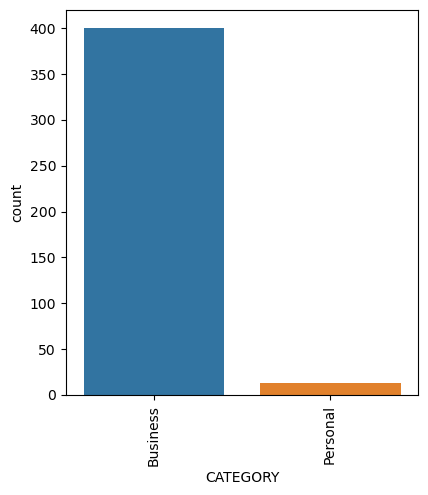

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)

# Continue with other plots if needed
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


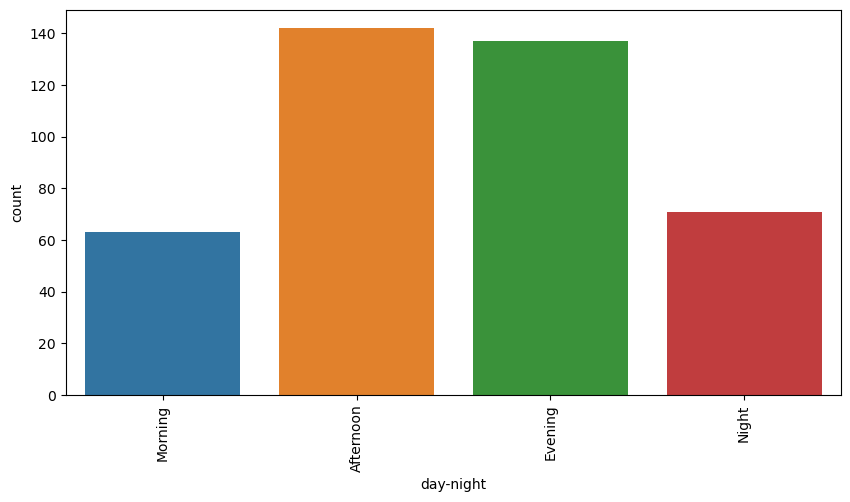

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Creating a countplot for 'day-night' column
sns.countplot(x='day-night', data=dataset)
plt.xticks(rotation=90)

plt.show()

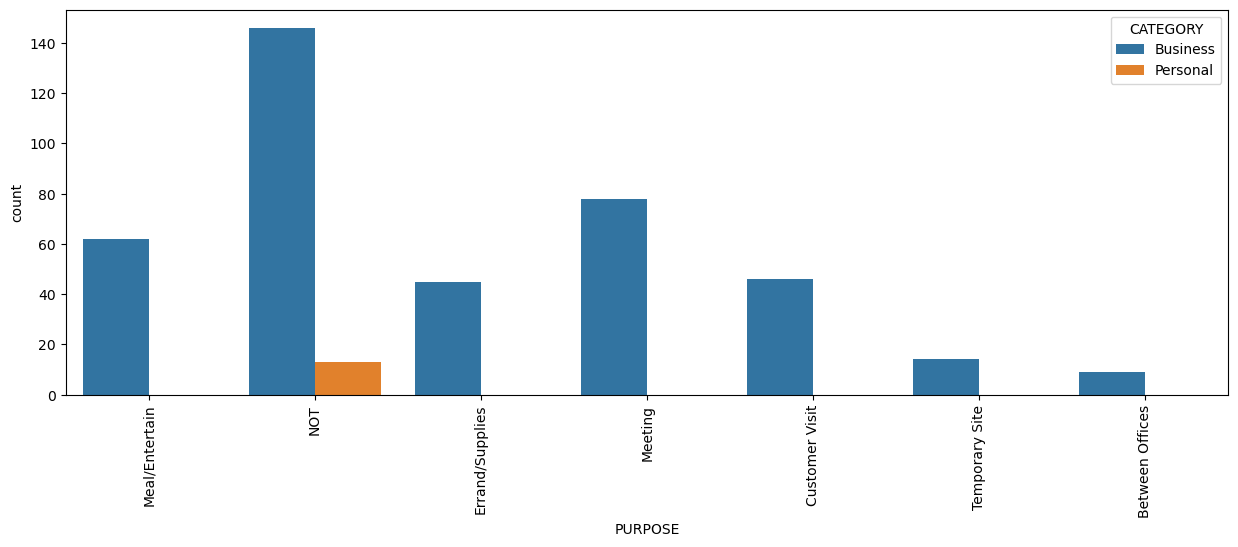

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: >

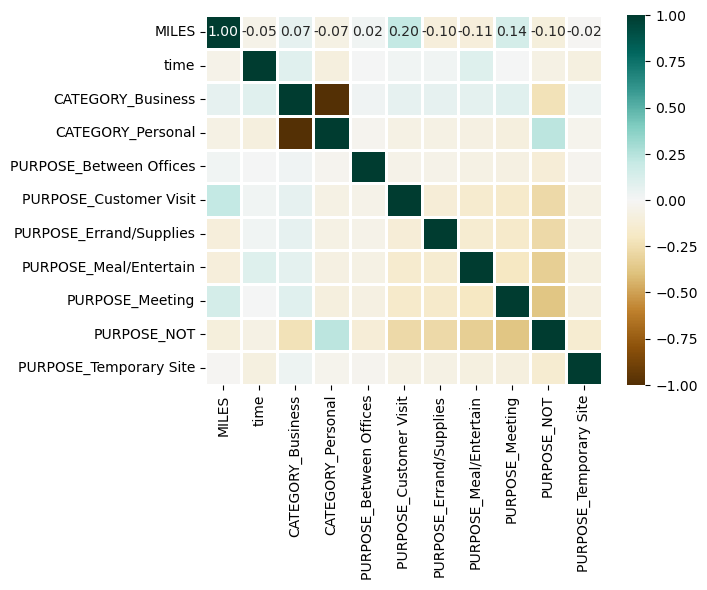

In [18]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

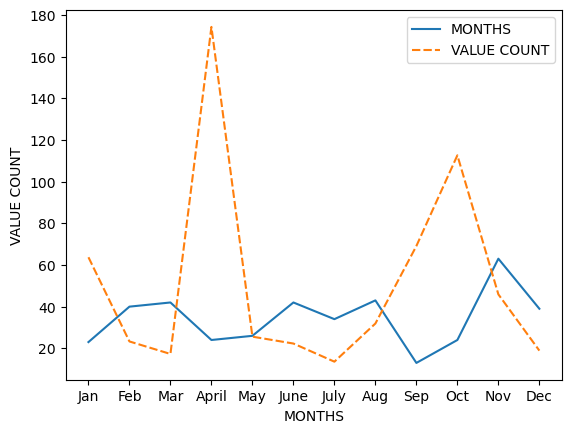

In [19]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [20]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

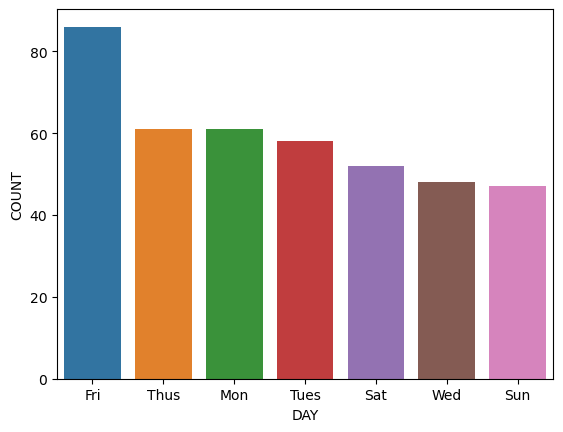

In [21]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: >

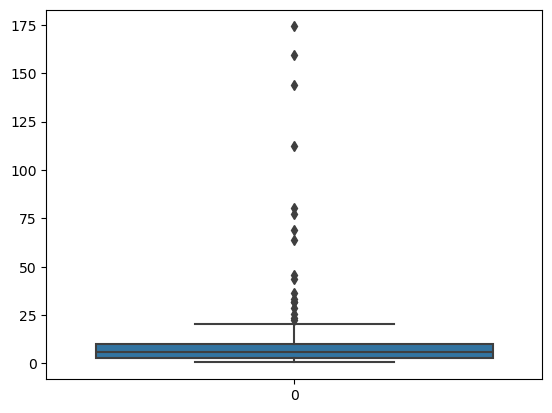

In [22]:
sns.boxplot(dataset['MILES'])

<Axes: >

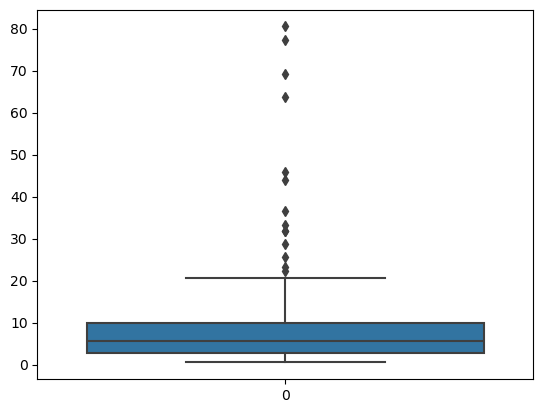

In [23]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_38326/1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MILES', ylabel='Density'>

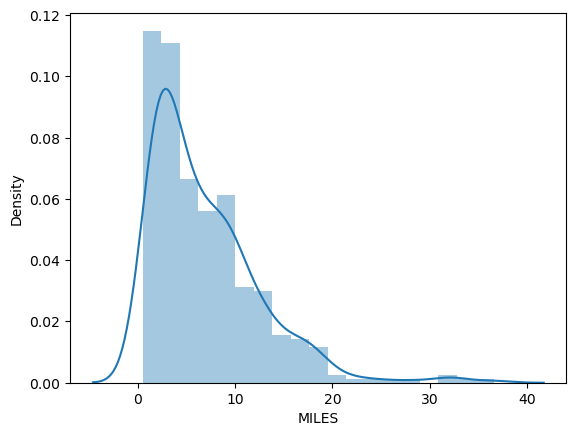

In [24]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv('UberDataset.csv')

# Data cleaning and preprocessing
data_cleaned = data.dropna(subset=['END_DATE', 'CATEGORY'])
data_cleaned['START_DATE'] = pd.to_datetime(data_cleaned['START_DATE'], errors='coerce')
data_cleaned['END_DATE'] = pd.to_datetime(data_cleaned['END_DATE'], errors='coerce')
data_cleaned['DURATION'] = (data_cleaned['END_DATE'] - data_cleaned['START_DATE']).dt.total_seconds() / 60.0
data_cleaned = data_cleaned.dropna(subset=['START_DATE', 'END_DATE', 'DURATION'])

# Features and target
X = data_cleaned[['CATEGORY', 'DURATION']]
y = data_cleaned['MILES']

# Preprocessing and model pipeline
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['CATEGORY'])], remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
'''This code is designed to predict the distance (in miles) of Uber trips based on their category and duration using a linear regression model'''

Mean Squared Error: 33.09093618329189
R-squared: 0.5843879255025172


/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/3421233423.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['START_DATE'] = pd.to_datetime(data_cleaned['START_DATE'], errors='coerce')
/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/3421233423.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['END_DATE'] = pd.to_datetime(data_cleaned['END_DATE'], errors='coerce')
/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/3421233423.py:1

/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/976920798.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['START_DATE'] = pd.to_datetime(data_cleaned['START_DATE'], errors='coerce')
/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/976920798.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['END_DATE'] = pd.to_datetime(data_cleaned['END_DATE'], errors='coerce')
/var/folders/gx/9f1xwz_96jj_t7q57vxhqq5h0000gn/T/ipykernel_39408/976920798.py:13: 

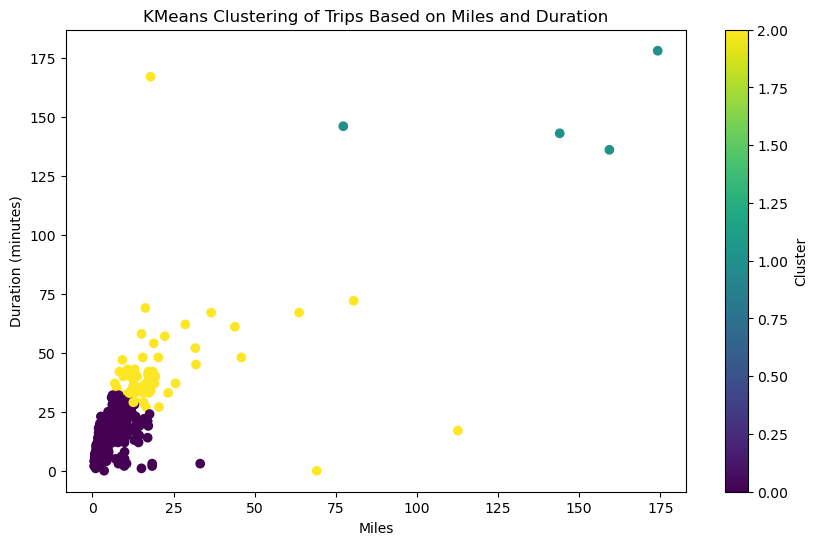

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('UberDataset.csv')

# Data cleaning and preprocessing
data_cleaned = data.dropna(subset=['END_DATE', 'CATEGORY'])
data_cleaned['START_DATE'] = pd.to_datetime(data_cleaned['START_DATE'], errors='coerce')
data_cleaned['END_DATE'] = pd.to_datetime(data_cleaned['END_DATE'], errors='coerce')
data_cleaned['DURATION'] = (data_cleaned['END_DATE'] - data_cleaned['START_DATE']).dt.total_seconds() / 60.0
data_cleaned = data_cleaned.dropna(subset=['START_DATE', 'END_DATE', 'DURATION'])

# Selecting features for clustering
X_clustering = data_cleaned[['MILES', 'DURATION']]

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['MILES'], data_cleaned['DURATION'], c=data_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Miles')
plt.ylabel('Duration (minutes)')
plt.title('KMeans Clustering of Trips Based on Miles and Duration')
plt.colorbar(label='Cluster')
plt.show()
'''This code performs KMeans clustering on an Uber dataset to categorize trips based on the miles traveled and the trip duration'''


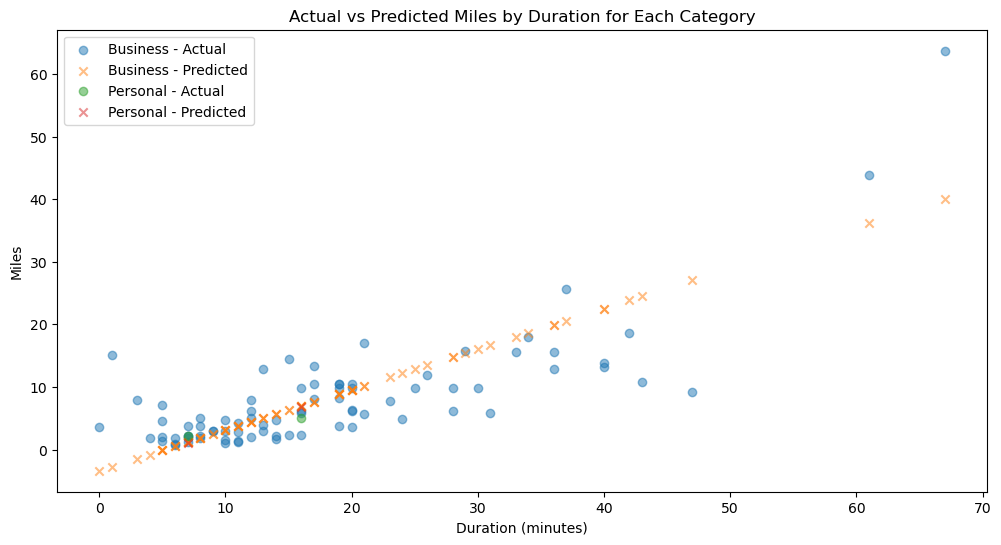

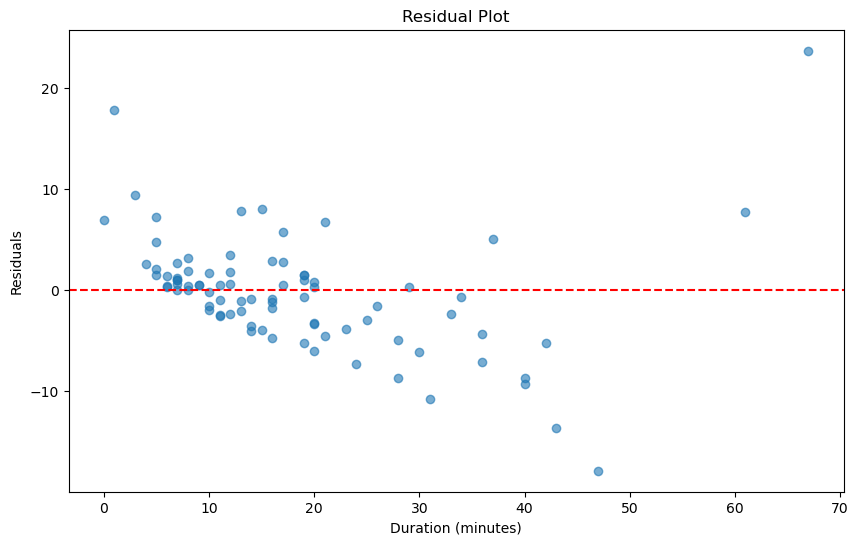

In [4]:
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = pipeline.predict(X_test)

# Plot predictions vs actual values for each CATEGORY
categories = X_test['CATEGORY'].unique()
plt.figure(figsize=(12, 6))

for category in categories:
    # Filter data for each category
    category_mask = X_test['CATEGORY'] == category
    duration_category = X_test[category_mask]['DURATION']
    actual_miles = y_test[category_mask]
    predicted_miles = y_pred[category_mask]

    # Plot actual vs predicted for each category
    plt.scatter(duration_category, actual_miles, label=f'{category} - Actual', alpha=0.5)
    plt.scatter(duration_category, predicted_miles, label=f'{category} - Predicted', alpha=0.5, marker='x')

# Add labels and legend
plt.xlabel('Duration (minutes)')
plt.ylabel('Miles')
plt.title('Actual vs Predicted Miles by Duration for Each Category')
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test['DURATION'], residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Duration (minutes)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()